In [7]:
import cv2 as cv 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
img=cv.imread('./lena.jpg')
print(img.shape)
print(img[100,100])
print(img[100,100,0])
print(img[100,100,1])

(528, 532, 3)
[ 49  66 133]
49
66


In [12]:
img=cv.imread('./target.jpg')
rows,cols=img.shape[:2]
# 这里的第一个参数为旋转中心，第二个为旋转角度，第三个为旋转后的缩放因子
# 可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
M=cv.getRotationMatrix2D((cols/2,rows/2),45,0.6)
# 第三个参数是输出图像的尺寸中心
dst=cv.warpAffine(img,M,(2*cols,2*rows))
while(1):
    cv.imshow('img',dst)
    if cv.waitKey(1)&0xFF==27:
        break
cv.destroyAllWindows()

In [12]:
#图像特征检测
#fast
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('./blox.jpg',0)
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, img,color=(255,0,0))
# Print all default params
print ("Threshold: ", fast.getThreshold())
print ("nonmaxSuppression: ", fast.getNonmaxSuppression())
print ("neighborhood: ",fast.getType())
print ("Total Keypoints with nonmaxSuppression: ", len(kp))
cv2.imwrite('fast_true.png',img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print ("Total Keypoints without nonmaxSuppression: ", len(kp))
img3 = cv2.drawKeypoints(img, kp, img,color=(255,0,0))
cv2.imwrite('fast_false.png',img3)

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  431
Total Keypoints without nonmaxSuppression:  1575


True

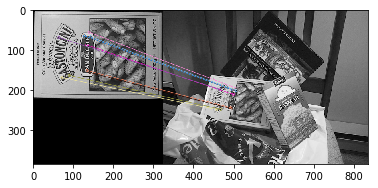

(<matplotlib.image.AxesImage at 0x16d19002978>, None)

In [25]:
#对ORB 描述符进行蛮力匹配
import numpy as np
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread('./box.png',0) # queryImage
img2 = cv2.imread('./box_in_scene.png',0) # trainImage
# Initiate SIFT detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)
plt.imshow(img3),plt.show()

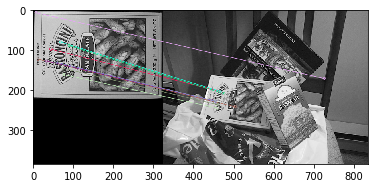

(<matplotlib.image.AxesImage at 0x2d11eb121d0>, None)

In [2]:
#对SIFT 描述符进行蛮力匹配和比值测试
import numpy as np
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread('box.png',0) # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
# 比值测试，首先获取与 A 距离最近的点 B （最近）和 C （次近），只有当 B/C
# 小于阈值时（ 0.75 ）才被认为是匹配，因为假设匹配是一一对应的，真正的匹配的理想距离为 0
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:10],None,flags=2)
plt.imshow(img3),plt.show()

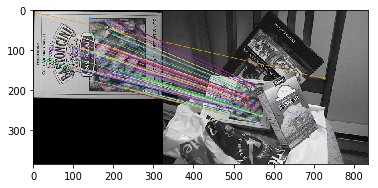

(<matplotlib.image.AxesImage at 0x2d11ebb10f0>, None)

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread('box.png',0) # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img3),plt.show()

In [1]:
import cv2
cv2.__version__

'3.4.2'

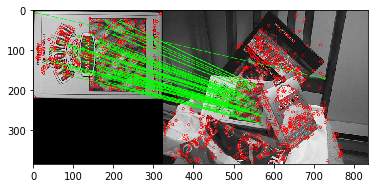

(<matplotlib.image.AxesImage at 0x2d11ef561d0>, None)

In [6]:
#FLANN 匹配器
import numpy as np
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread('box.png',0) # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
singlePointColor = (255,0,0),
matchesMask = matchesMask,
flags = 0)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

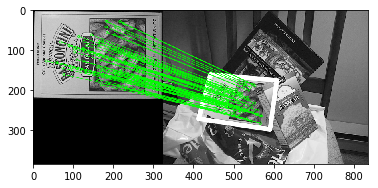

(<matplotlib.image.AxesImage at 0x2d11efbb9b0>, None)

In [8]:
#使用特征匹配和单应性查找对象
import numpy as np
import cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('box.png',0) # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
# 获取关键点的坐标
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
# 第三个参数 Method used to computed a homography matrix. The following methods are possible:
#0 - a regular method using all the points
#CV_RANSAC - RANSAC-based robust method
#CV_LMEDS - Least-Median robust method
# 第四个参数取值范围在 1 到 10 ，?绝一个点对的阈值。原图像的点经过变换后点与目标图像上对应点的误差
# 超过误差就认为是 outlier
# 返回值中 M 为变换矩阵。
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
# 获得原图像的高和宽
    h,w = img1.shape
# 使用得到的变换矩阵对原图像的四个角进行变换，获得在目标图像上对应的坐标。
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
# 原图像为灰度图
    cv2.polylines(img2,[np.int32(dst)],True,255,10, cv2.LINE_AA)
else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [11]:
#meanshift跟踪视频图像
import numpy as np
import cv2
cap = cv2.VideoCapture('./boy.mp4')
# take first frame of the video
ret,frame = cap.read()
# setup initial location of window
r,h,c,w = 250,90,400,125 # simply hardcoded the values
track_window = (c,r,w,h)
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
cv2.destroyAllWindows()
cap.release()

In [14]:
#光流法
import cv2
import numpy as np
cap = cv2.VideoCapture("./vtest.avi")
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
while(1):
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    #cv2.calcOpticalFlowFarneback(prev, next, pyr_scale, levels, winsize, iterations, poly_n,
    #poly_sigma, flags[)
    #pyr_scale – parameter, specifying the image scale (<1) to build pyramids for each image;
    #pyr_scale=0.5 means a classical pyramid, where each next layer is twice smaller than the
    #previous one.
    #poly_n – size of the pixel neighborhood used to find polynomial expansion in each pixel;
    #typically poly_n =5 or 7.
    #poly_sigma – standard deviation of the Gaussian that is used to smooth derivatives used
    #as a basis for the polynomial expansion; for poly_n=5, you can set poly_sigma=1.1, for
    #poly_n=7, a good value would be poly_sigma=1.5.
    #flag 可选 0 或 1,0 计算快， 1 慢但准确
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    #cv2.cartToPolar Calculates the magnitude and angle of 2D vectors.
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    cv2.imshow('frame2',rgb)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',rgb)
    prvs = next
cap.release()
cv2.destroyAllWindows()

In [1]:
#背景减除


result:  [[ 1.]] 

neighbours:  [[ 1.  0.  1.]] 

distance:  [[ 337.  433.  557.]]


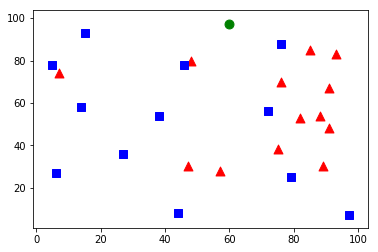

In [13]:
#knn最近邻算法
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# Labels each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)
# Take Red families and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# Take Blue families and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
#plt.show()
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print("result: ", results,"\n")
print("neighbours: ", neighbours,"\n")
print("distance: ", dist)
plt.show()

result:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]] 

neighbours:  [[ 0.  0.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]] 

distance:  [[   65.   196.  1028.]
 [  818.   949.  1097.]
 [   58.   153.   242.]
 [  125.   530.   712.]
 [  160.   400.   425.]
 [  800.   845.  1066.]
 [  241.   425.   457.]
 [  200.   580.   709.]
 [  772.   842.   905.]
 [   41.    81.   221.]]


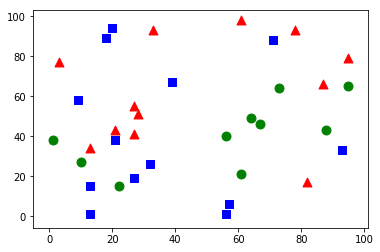

In [16]:
#knn最近邻算法,传入一组数据，结果为数组
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# Labels each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)
# Take Red families and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# Take Blue families and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
#plt.show()
newcomers = np.random.randint(0,100,(10,2)).astype(np.float32)
plt.scatter(newcomers[:,0],newcomers[:,1],80,'g','o')
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
ret, results, neighbours ,dist = knn.findNearest(newcomers, 3)
print("result: ", results,"\n")
print("neighbours: ", neighbours,"\n")
print("distance: ", dist)
plt.show()

In [22]:
#利用knn进行手写数字识别OCR
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Now we split the image to 5000 cells, each 20x20 size
#先按行分割成50份，再分别按列分割成100份
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)
# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print (accuracy)

91.76


In [1]:
#K聚类颜色量化
import numpy as np
import cv2
img = cv2.imread('home.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
img = cv2.imread('lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()